In [2]:
import pandas
import numpy
import os
import pybedtools
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/arushiv/toolScripts')
from esiScoreAfterMean import calculate_ESI

In [3]:
d = pandas.read_csv("intermediateFiles/calculate_avg_posterior/avgPostriors.dat", sep='\t')
d.head()
#d[(d['cell'] == "GM12878") & (d['annotation'] == "hotRegions")]

,chrom,start,end,cell,annotation,avg_posterior,infoContent
0,chr1,3564262,3578038,GM12878,broadDomains,0.213090,1.887590
1,chr1,6083568,6094425,GM12878,broadDomains,0.523513,2.568175
2,chr1,6842403,6852404,GM12878,broadDomains,0.348671,3.639130
3,chr1,8476074,8485400,GM12878,broadDomains,0.269500,5.003266
4,chr1,8927380,8940954,GM12878,broadDomains,0.414123,4.852667


In [4]:
def makePlot(a, x, y, outfile, xtitle, ytitle):
    sns.set_style("white")
    ge = sns.FacetGrid(a, col="annotation", row="cell", margin_titles=True, hue="annotation", palette="Set1")
    (ge.map(sns.kdeplot, x, y, shade=True)
     .set(xlim=(0, max(a[x])), ylim=(0, max(a[y])))
     .set_titles("{col_name}")
     .set_xlabels(xtitle)
     .set_ylabels(ytitle)
     .fig.subplots_adjust(wspace=.05, hspace=.05)
     )
#     g.axes.set_xlabel(xtitle)
#     g.axes.set_ylabel(ytitle)
    plt.savefig(outfile)  

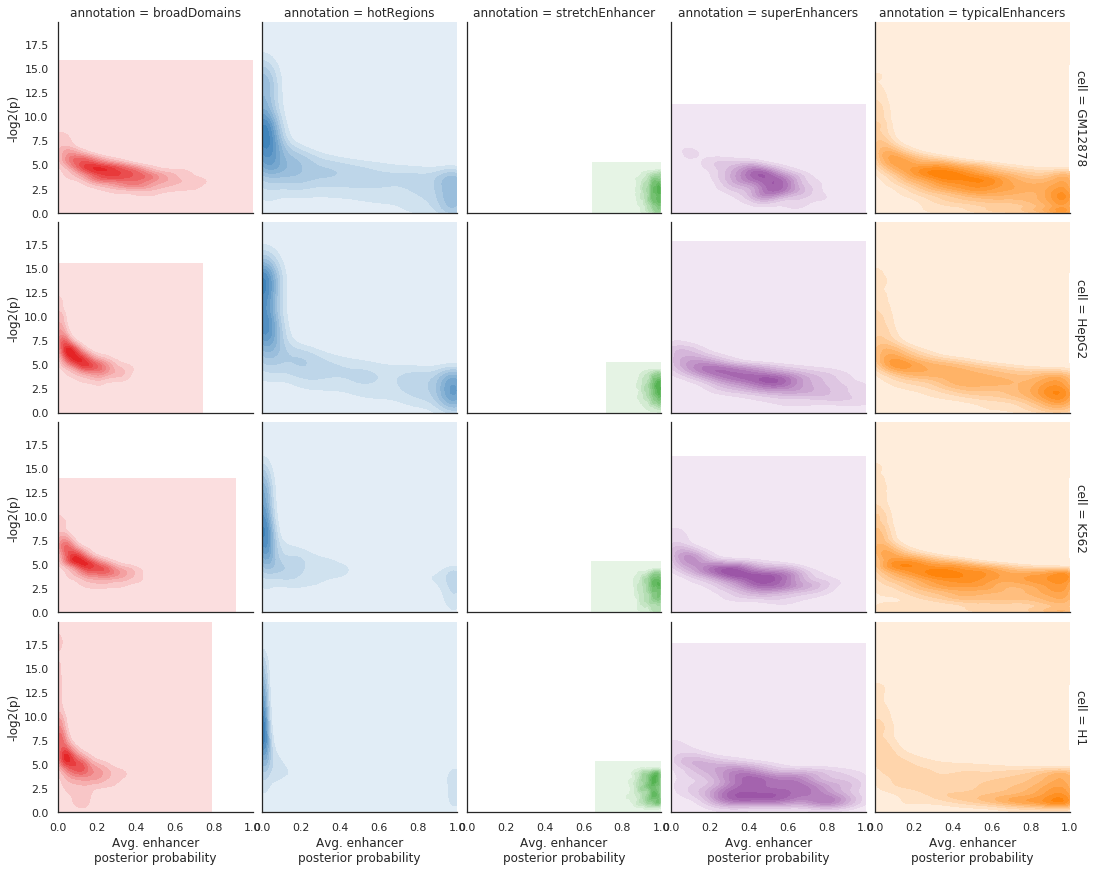

In [253]:
makePlot(d, "avg_posterior", "infoContent", "fig.infoContent.pdf", "Avg. enhancer\nposterior probability", "-log2(p)")  

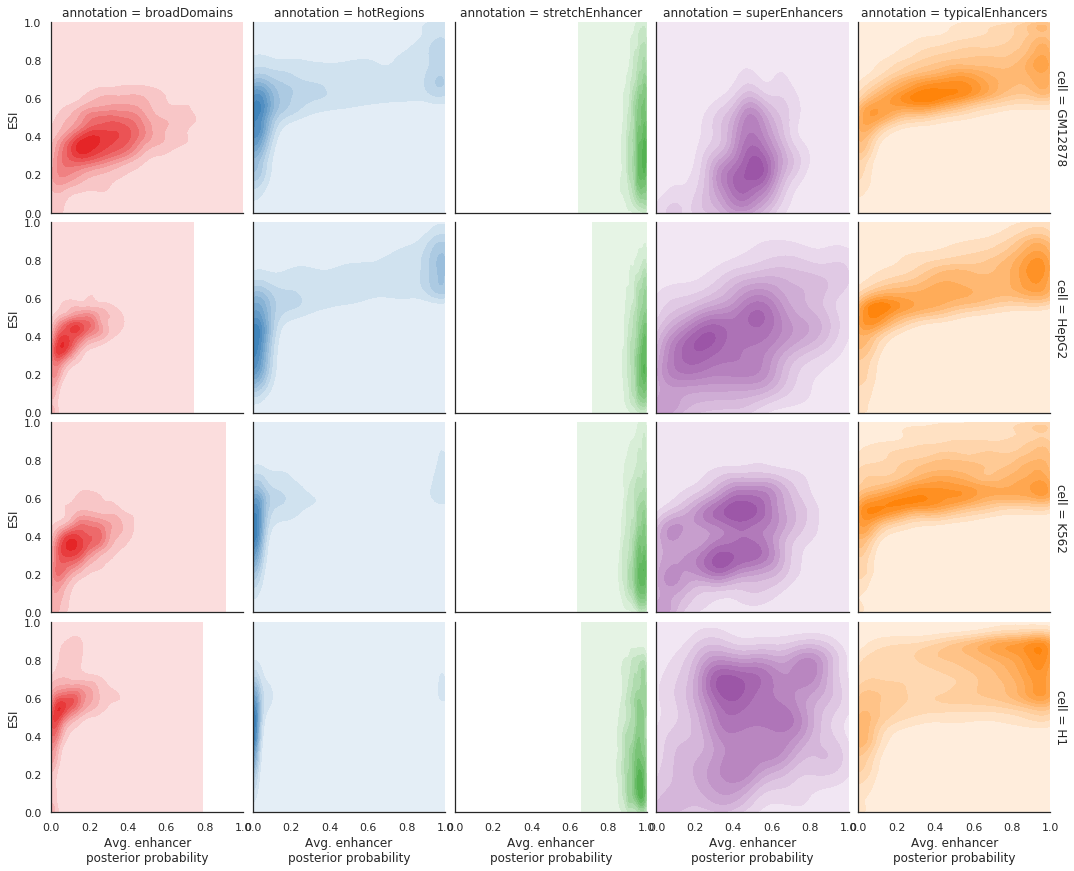

In [255]:
d_esi = pandas.read_csv("intermediateFiles/calculate_avg_posterior/ESI_full.dat", sep='\t')
makePlot(d_esi, "avg_post", "ESI", "fig.ESI.pdf", "Avg. enhancer\nposterior probability", "ESI")  

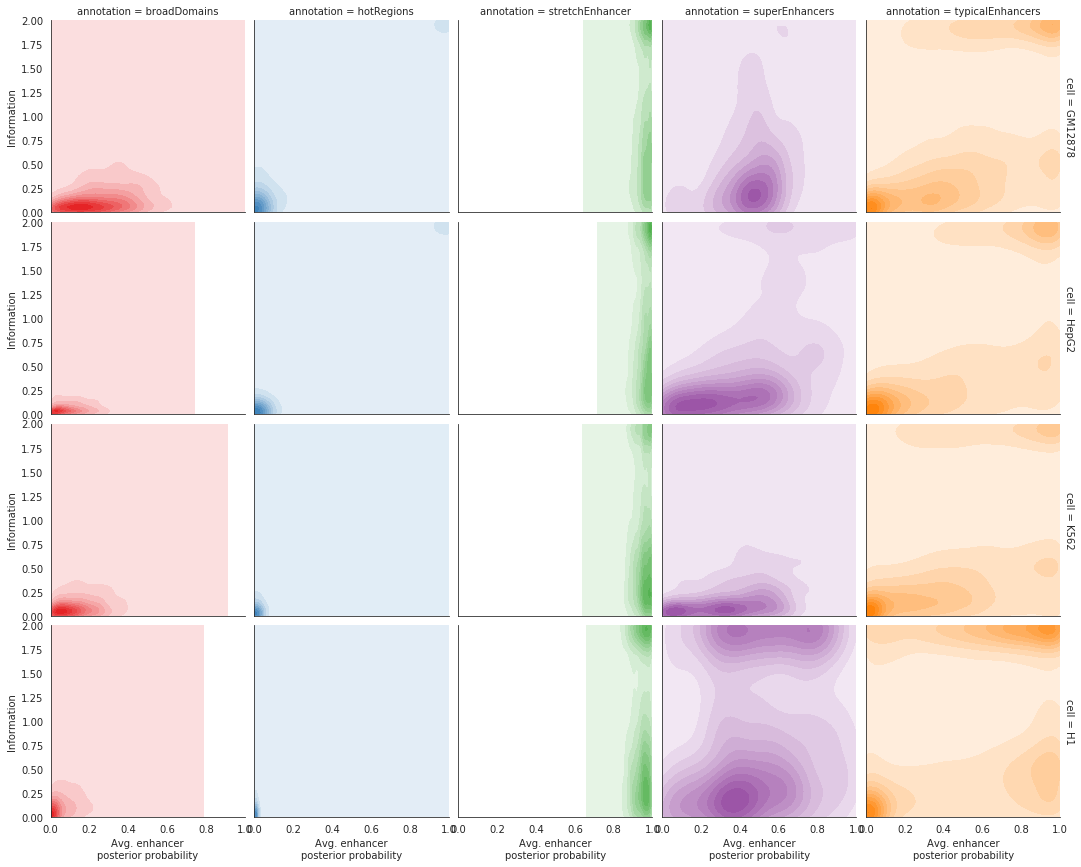

In [5]:
d_information = pandas.read_csv("intermediateFiles/calculate_avg_posterior/subset4_information_full.dat", sep='\t')
makePlot(d_information, "avg_post", "information", "fig.info_4cell.pdf", "Avg. enhancer\nposterior probability", "Information")

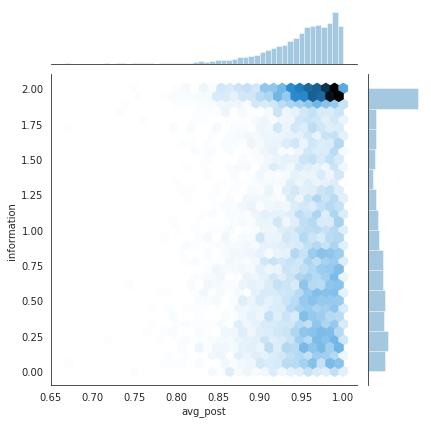

In [10]:
# def makePlot(a, x, y, outfile, xtitle, ytitle):
#     sns.set_style("white")
#     ge = sns.FacetGrid(a, col="annotation", row="cell", margin_titles=True, hue="annotation", palette="Set1")
#     (ge.map(sns.kdeplot, x, y, shade=True)
#      .set(xlim=(0, max(a[x])), ylim=(0, max(a[y])))
#      .set_titles("{col_name}")
#      .set_xlabels(xtitle)
#      .set_ylabels(ytitle)
#      .fig.subplots_adjust(wspace=.05, hspace=.05)
#      )
# #     g.axes.set_xlabel(xtitle)
# #     g.axes.set_ylabel(ytitle)
#     plt.savefig(outfile)  
    
sns.jointplot(data = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="stretchEnhancer")], x="avg_post", y="information", kind="hex")


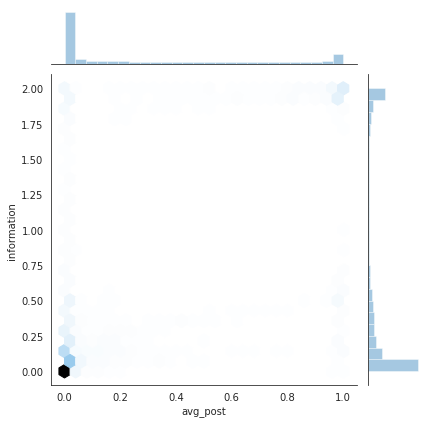

In [11]:
sns.jointplot(data = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="hotRegions")], x="avg_post", y="information", kind="hex")

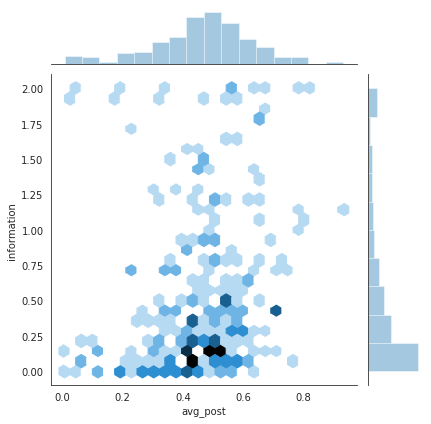

In [22]:
sns.jointplot(data = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")], x="avg_post", y="information", kind="hex", joint_kws=dict(gridsize=25))

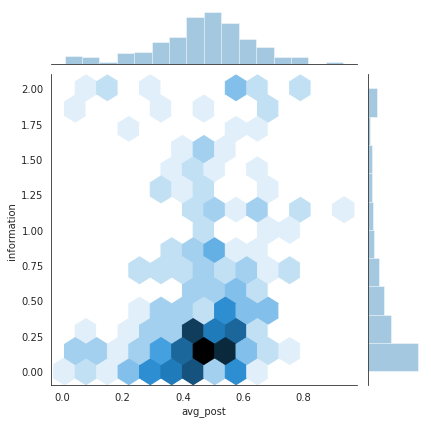

In [21]:
sns.jointplot(data = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")], x="avg_post", y="information", kind="hex")

In [44]:
dt = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")]
def makeHexBin(dt):
    dt.dropna(axis=0, subset=['avg_post','information'], inplace=True)
    x = dt['avg_post']
    y = dt['information']
    g = sns.JointGrid(x, y)
    g.ax_marg_x.hist(x)
    g.ax_marg_y.hist(y, orientation="horizontal")
    g.plot_joint(plt.hexbin, gridsize=25, extent=[0, 1, 0, 2], cmap="viridis")
    

/home/arushiv/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


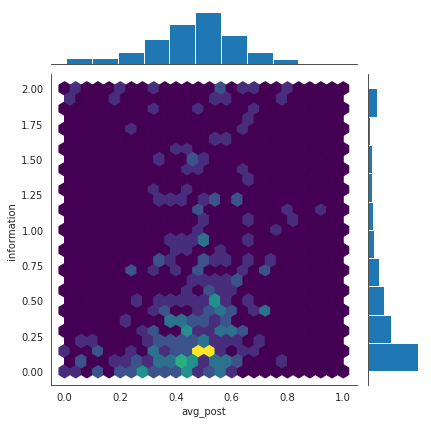

In [45]:
p1 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")])

/home/arushiv/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


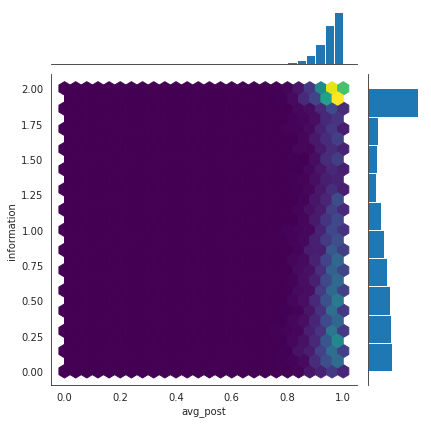

In [46]:
p2 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="stretchEnhancer")])

/home/arushiv/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


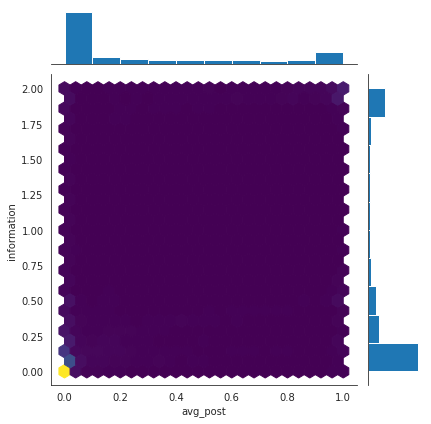

In [47]:
p3 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="hotRegions")])

In [56]:

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])
                
    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

        
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
#import SeabornFig2Grid as sfg
sfg = SeabornFig2Grid
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(p1, fig, gs[0])
mg1 = SeabornFig2Grid(p2, fig, gs[1])
mg2 = SeabornFig2Grid(p3, fig, gs[2])
mg3 = SeabornFig2Grid(p3, fig, gs[3])


AttributeError: 'NoneType' object has no attribute 'fig'

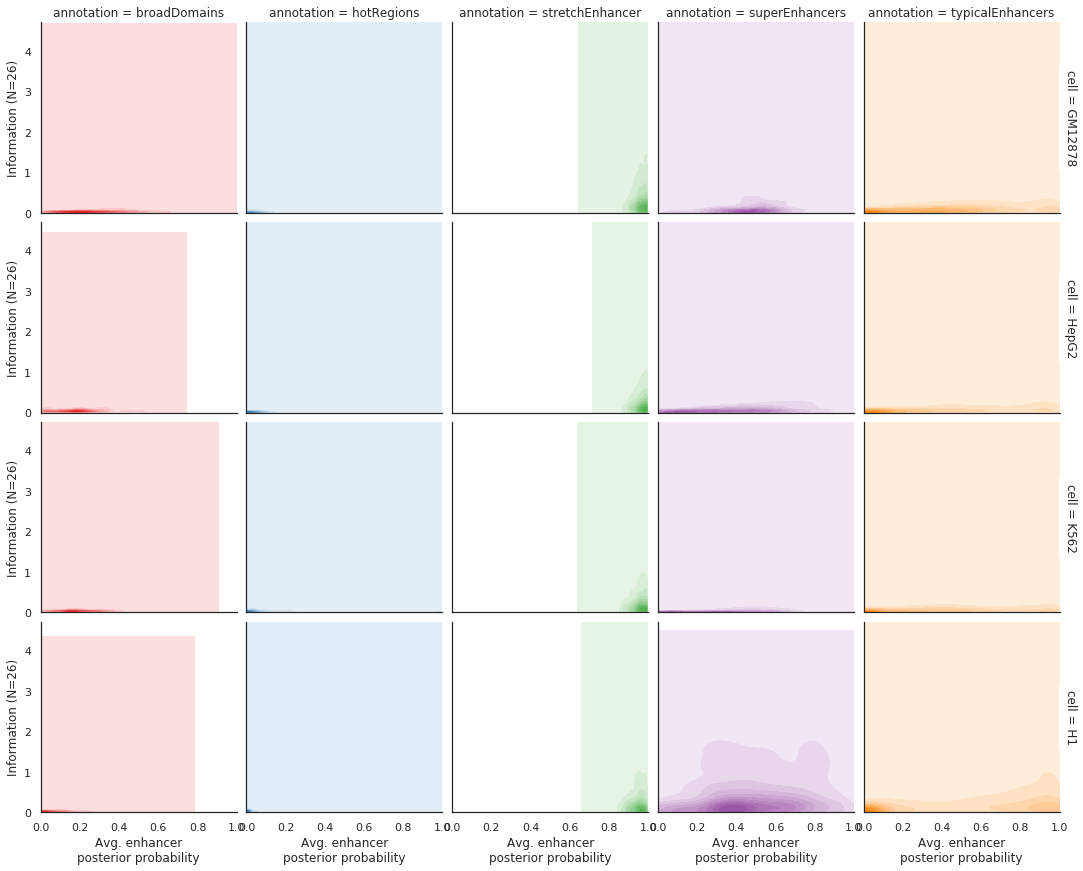

In [257]:
d_information_nosub = pandas.read_csv("intermediateFiles/calculate_avg_posterior/noSubset_information_full.dat", sep='\t')
makePlot(d_information_nosub, "avg_post", "information", "fig.info.pdf", "Avg. enhancer\nposterior probability", "Information (N=26)")

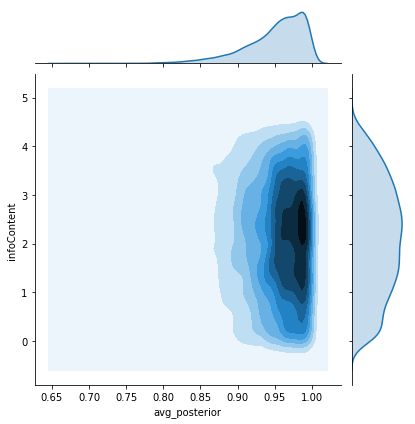

In [91]:
sns.jointplot(data = d, x="avg_posterior", y="infoContent", kind="kde")

In [153]:
def calc(filename, cell):
    t = pandas.read_csv(filename, sep='\t')
    t.loc[:,'avg_post'] = t['avg_posterior']
    t.set_index(['chrom', 'start', 'end', 'infoContent', 'cell', 'annotation', 'avg_post'], inplace=True)
    t.rename(columns={'avg_posterior':cell}, inplace=True)
    #print(t.head())
    out = calculate_ESI(t)
    out.reset_index(inplace=True)
    #print(out[['avg_post','GM12878']].head())
    return out

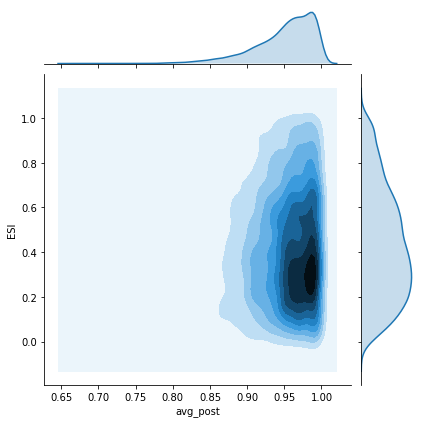

In [163]:
sns.jointplot(data = full[full['annotation']=="stretchEnhancer"], x="avg_post", y="ESI", kind="kde")

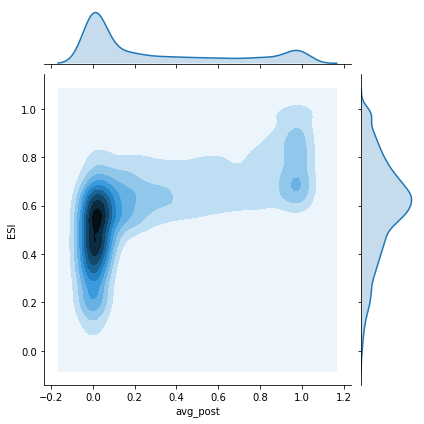

In [164]:
sns.jointplot(data = full[full['annotation']=="hotRegions"], x="avg_post", y="ESI", kind="kde")

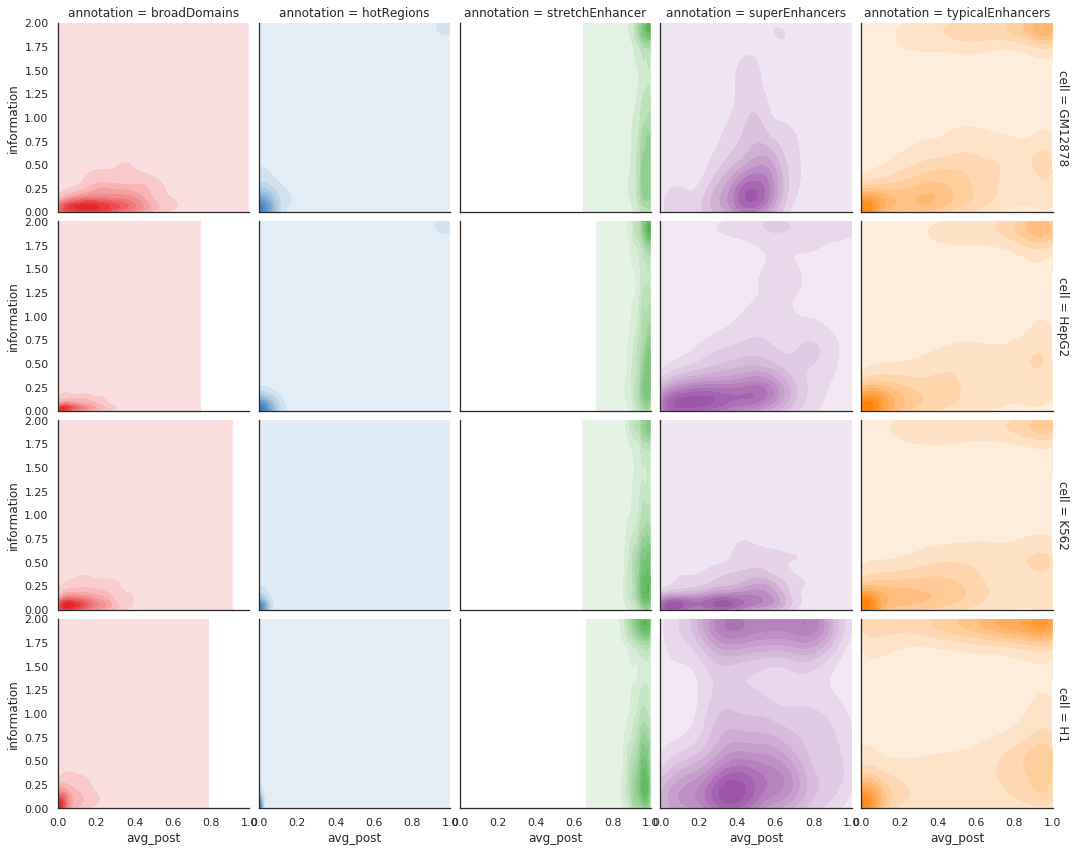

In [233]:
a = pandas.read_csv("intermediateFiles/calculate_avg_posterior/subset4_information_full.dat", sep='\t')
sns.set_style("white")
ge = sns.FacetGrid(a, col="annotation", row="cell", margin_titles=True, hue="annotation", palette="Set1")
ge.map(sns.kdeplot, "avg_post", "information", shade=True).set(xlim=(0, 1.0), ylim=(0, 2)).set_titles("{col_name}").fig.subplots_adjust(wspace=.05, hspace=.05)